<a href="https://colab.research.google.com/github/sarojkhanal-git/CBEAS-Project-Preprocessing/blob/Very_New_Codes/change_to_45_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nibabel as nib
import numpy as np
import os
from google.colab import drive
import glob
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
labels = sorted(glob.glob('/content/drive/MyDrive/Datasets_for_model/label_directory/*.nii.gz'))
images = sorted(glob.glob('/content/drive/MyDrive/Datasets_for_model/resampled_image_directory/*.nii.gz'))

In [4]:
len(labels), len(images)

(171, 171)

In [ ]:
print(np.unique(nib.load(labels[0]).get_fdata())[37])
print(np.unique(nib.load(labels[8]).get_fdata())[37])

77.0
72.0


In [ ]:
b = nib.load(labels[8]).get_fdata()
print(len(np.unique(b)))

46


In [ ]:
len(np.where(l8==77)[2])

2807

In [ ]:
b[b==72]=0
print(len(np.unique(b)))

45


In [ ]:
affine = np.eye(4)
img = nib.Nifti1Image(b, affine)
nib.save(img, '/content/drive/MyDrive/Datasets_for_model/test.nii.gz')

In [ ]:
test = nib.load('/content/drive/MyDrive/Datasets_for_model/test.nii.gz').get_fdata()
test.shape

(256, 256, 256)

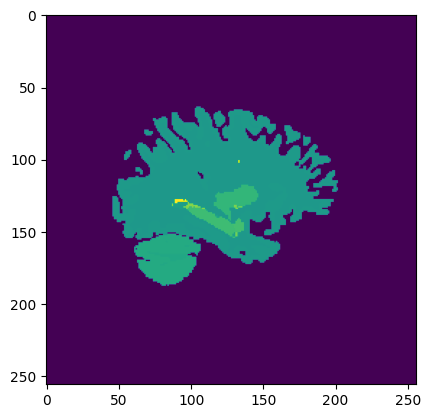

In [ ]:
plt.imshow(test[100, :, :])

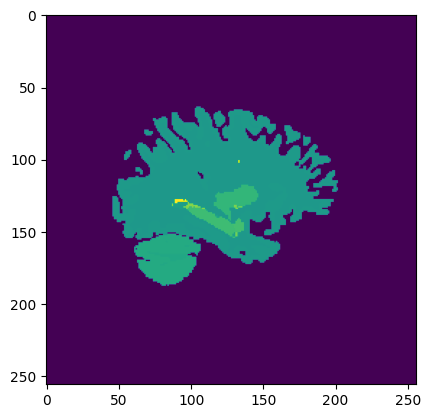

In [ ]:
plt.imshow(nib.load(labels[8]).get_fdata()[100, :, :])

In [ ]:
os.makedirs('/content/drive/MyDrive/Datasets_for_model/label_45_directory', exist_ok=True)

In [5]:
label_45 = '/content/drive/MyDrive/Datasets_for_model/label_45_directory'

In [6]:
import shutil

In [12]:
labels[96], labels[120]

('/content/drive/MyDrive/Datasets_for_model/label_directory/OAS30131_MR_d1901_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_directory/OAS30160_MR_d0751_label.nii.gz')

In [18]:

i = 1
for f in labels[120:121]:
  f2 = nib.load(f).get_fdata()
  if len(np.unique(f2))==46:
    print(f"{i} {os.path.basename(f)}")
    i+=1
    if np.unique(f2)[37]==72:
      f2[f2==72]=0
      affine = np.eye(4)
      img = nib.Nifti1Image(f2, affine)
      nib.save(img, os.path.join(label_45, os.path.basename(f)))
  else:
    shutil.copy(f, os.path.join(label_45, os.path.basename(f)))


1 OAS30160_MR_d0751_label.nii.gz


In [19]:
new_labels = sorted(glob.glob(os.path.join(label_45, '*.nii.gz')))
len(new_labels)

171

In [ ]:
l8 = nib.load(new_labels[8]).get_fdata()
len(np.unique(l8))

45

In [16]:
new_labels

['/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30001_MR_d0757_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30002_MR_d2340_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30003_MR_d0558_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30004_MR_d2232_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30005_MR_d2384_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30006_MR_d2341_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30007_MR_d1641_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30008_MR_d2035_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30009_MR_d2457_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_model/label_45_directory/OAS30010_MR_d1514_label.nii.gz',
 '/content/drive/MyDrive/Datasets_for_mo